In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#matplotlib 显示中文
matplotlib.rcParams['font.sans-serif']=['STHeiti']
import matplotlib.patches as mpatches
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc

In [31]:
df = pd.read_csv("./diabetes_data.csv")
df.head() 

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1879 non-null   int64  
 1   Age                            1879 non-null   int64  
 2   Gender                         1879 non-null   int64  
 3   Ethnicity                      1879 non-null   int64  
 4   SocioeconomicStatus            1879 non-null   int64  
 5   EducationLevel                 1879 non-null   int64  
 6   BMI                            1879 non-null   float64
 7   Smoking                        1879 non-null   int64  
 8   AlcoholConsumption             1879 non-null   float64
 9   PhysicalActivity               1879 non-null   float64
 10  DietQuality                    1879 non-null   float64
 11  SleepQuality                   1879 non-null   float64
 12  FamilyHistoryDiabetes          1879 non-null   i

In [33]:
df.isnull().sum()

PatientID                        0
Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryDiabetes            0
GestationalDiabetes              0
PolycysticOvarySyndrome          0
PreviousPreDiabetes              0
Hypertension                     0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
CholesterolTotal                 0
CholesterolLDL                   0
CholesterolHDL                   0
CholesterolTriglycerides         0
AntihypertensiveMedications      0
Statins             

In [34]:
df.describe(include='all')

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
count,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,...,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879.000000,1879
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Confidential
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1879
mean,6939.000000,55.043108,0.487493,0.755721,0.992017,1.699308,27.687601,0.281533,10.096587,5.200790,...,0.111229,48.508643,0.052155,0.103246,0.200639,1.997101,4.957539,5.011736,0.400213,NaN
std,542.564896,20.515839,0.499977,1.047558,0.764940,0.885665,7.190975,0.449866,5.914216,2.857012,...,0.314500,28.758488,0.222400,0.304361,0.400585,1.122632,2.910934,2.920908,0.490072,NaN
min,6000.000000,20.000000,0.000000,0.000000,0.000000,0.000000,15.025898,0.000000,0.000928,0.004089,...,0.000000,0.002390,0.000000,0.000000,0.000000,0.004013,0.005384,0.000362,0.000000,NaN
25%,6469.500000,38.000000,0.000000,0.000000,0.000000,1.000000,21.469981,0.000000,4.789725,2.751022,...,0.000000,23.974098,0.000000,0.000000,0.000000,1.057801,2.420024,2.410113,0.000000,NaN
50%,6939.000000,55.000000,0.000000,0.000000,1.000000,2.000000,27.722988,0.000000,10.173865,5.249002,...,0.000000,47.519693,0.000000,0.000000,0.000000,1.987170,4.843886,5.035208,0.000000,NaN
75%,7408.500000,73.000000,1.000000,1.000000,2.000000,2.000000,33.856460,1.000000,15.285359,7.671402,...,0.000000,72.883179,0.000000,0.000000,0.000000,2.946019,7.513933,7.586865,1.000000,NaN


In [35]:
print(f"样本中被诊断为糖尿病的有{sum(df['Diagnosis']==1)}人，没有糖尿病的有{sum(df['Diagnosis']==0)}人")

样本中被诊断为糖尿病的有752人，没有糖尿病的有1127人


In [36]:
#去掉诊断结果列以及ID、主管医生，将剩下的特征分成类别型和数值型
characteristic = ['Gender','Ethnicity','SocioeconomicStatus','EducationLevel','Smoking','FamilyHistoryDiabetes','GestationalDiabetes',
'PolycysticOvarySyndrome','PreviousPreDiabetes','Hypertension','AntihypertensiveMedications','Statins','AntidiabeticMedications','FrequentUrination',
'ExcessiveThirst','UnexplainedWeightLoss','BlurredVision','SlowHealingSores','TinglingHandsFeet','HeavyMetalsExposure','OccupationalExposureChemicals','WaterQuality']

numerical_features = [ 
    'Age', 
    'BMI', 
    'AlcoholConsumption',
    'PhysicalActivity',
    'DietQuality', 
    'SleepQuality',
    'SystolicBP', 
    'DiastolicBP', 
    'FastingBloodSugar', 
    'HbA1c', 
    'SerumCreatinine', 
    'BUNLevels', 
    'CholesterolTotal', 
    'CholesterolLDL', 
    'CholesterolHDL', 
    'CholesterolTriglycerides', 
    'FatigueLevels', 
    'QualityOfLifeScore', 
    'MedicationAdherence', 
    'MedicalCheckupsFrequency',
    'HealthLiteracy'
]



In [37]:
# 删除患者ID列和主管医生列
df.drop(['PatientID','DoctorInCharge'],axis=1,inplace=True)

In [38]:
personal_info = ['Age','Gender','Ethnicity', 'SocioeconomicStatus','EducationLevel', 'BMI']
lifestyle = ['Smoking', 'AlcoholConsumption','PhysicalActivity', 'DietQuality', 'SleepQuality','QualityOfLifeScore']
medical_history = ['FamilyHistoryDiabetes', 'GestationalDiabetes','PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension']
measurements = [ 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c','SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL','CholesterolHDL', 'CholesterolTriglycerides']
medication = [ 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications']
symptom = ['FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss','FatigueLevels', 'BlurredVision', 'SlowHealingSores','TinglingHandsFeet']
environment = ['HeavyMetalsExposure','OccupationalExposureChemicals', 'WaterQuality']
health = ['MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']

====================================================================== 个人统计信息 ======================================================================


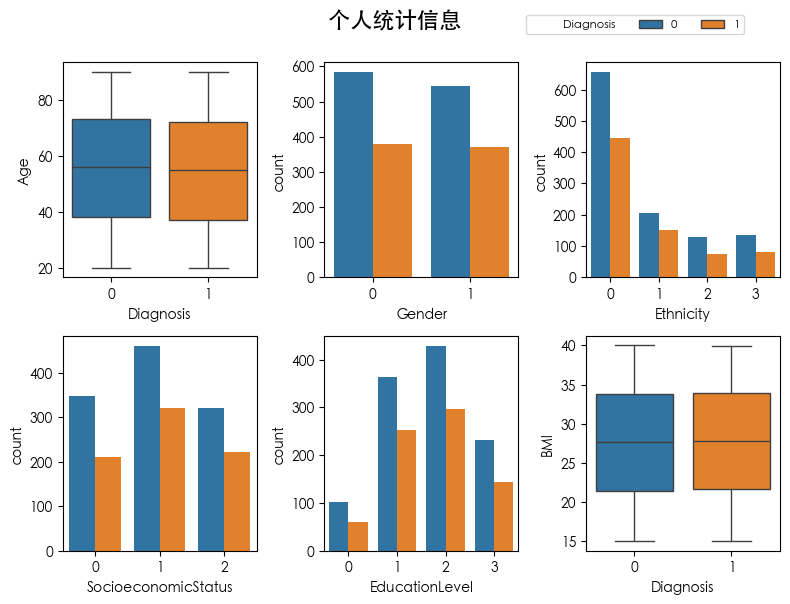

====================================================================== 生活方式 ======================================================================


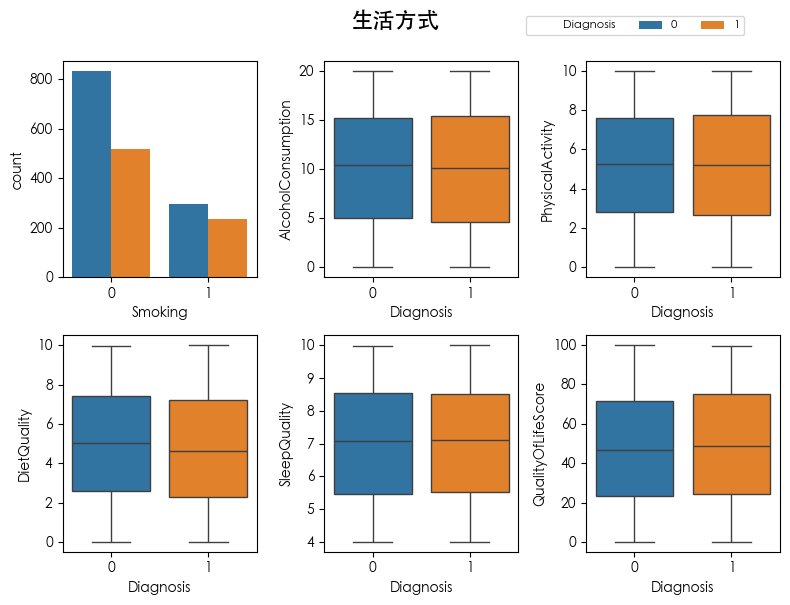

====================================================================== 病史 ======================================================================


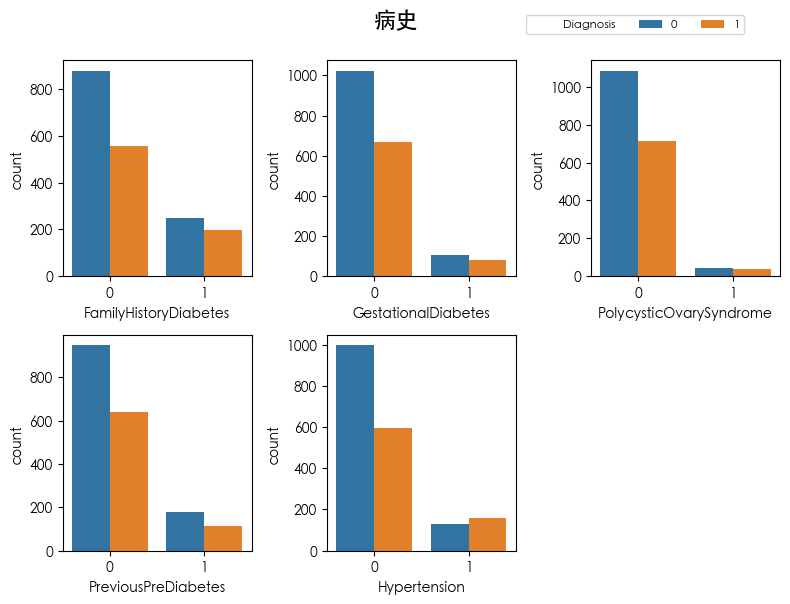

====================================================================== 医学测量结果 ======================================================================


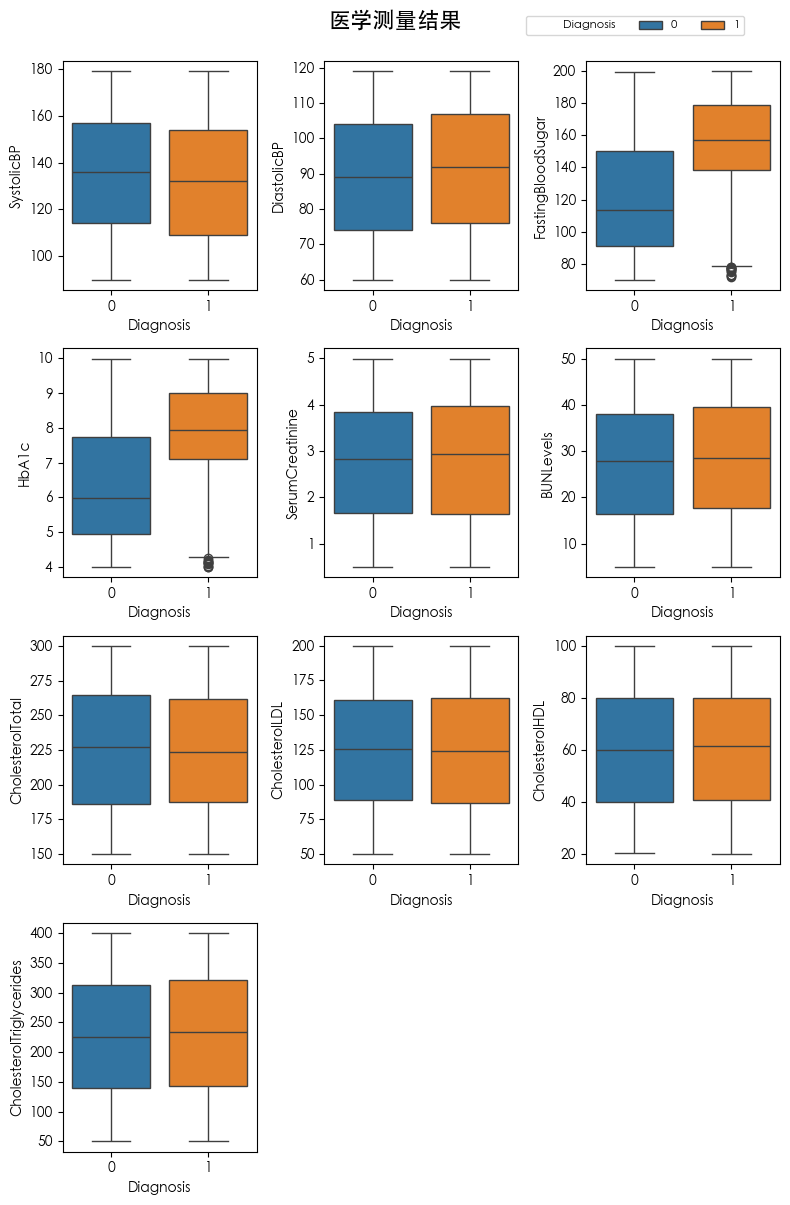

====================================================================== 药史 ======================================================================


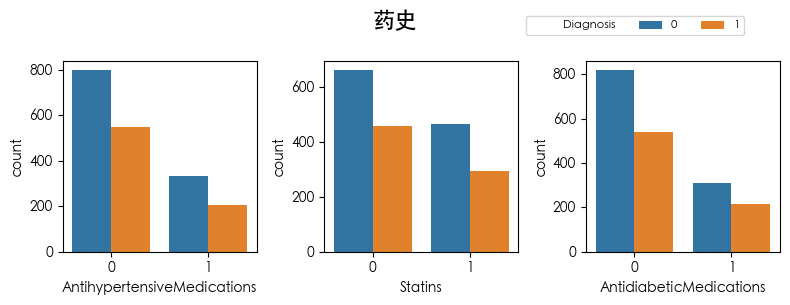

====================================================================== 症状 ======================================================================


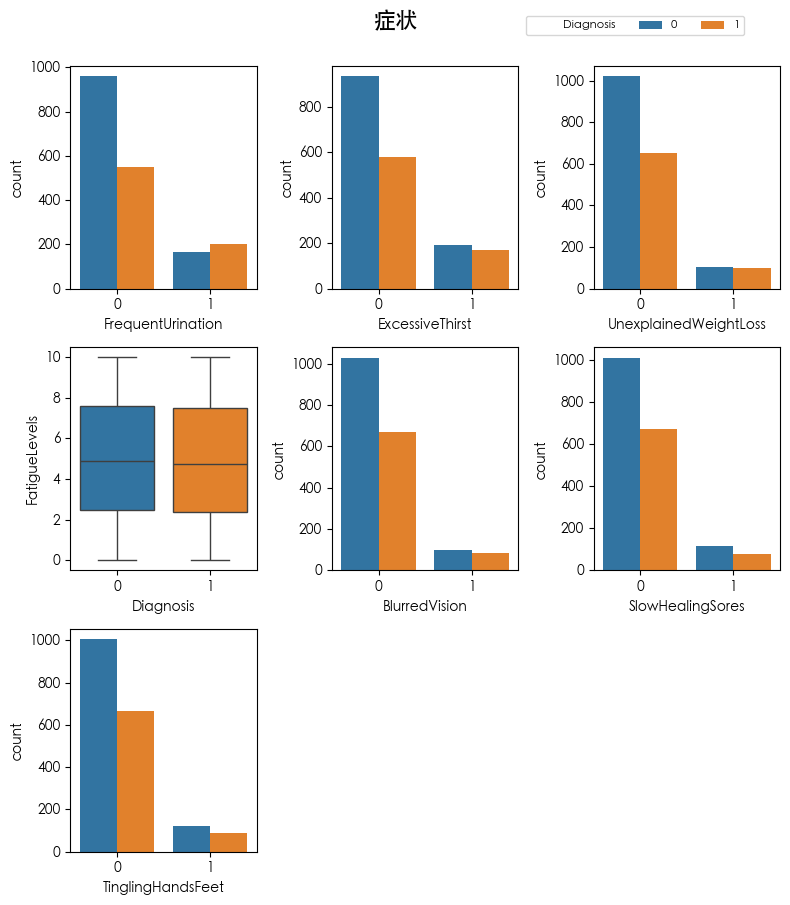

====================================================================== 环境情况 ======================================================================


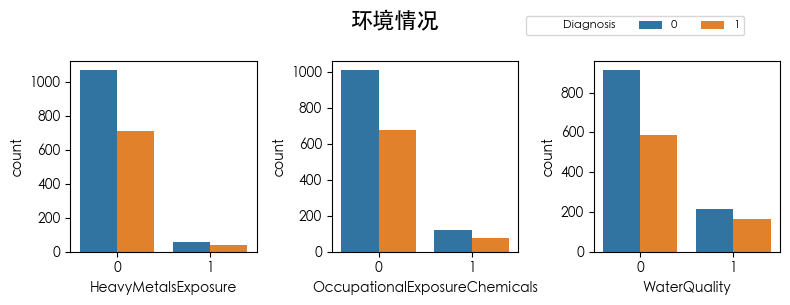

====================================================================== 健康情况 ======================================================================


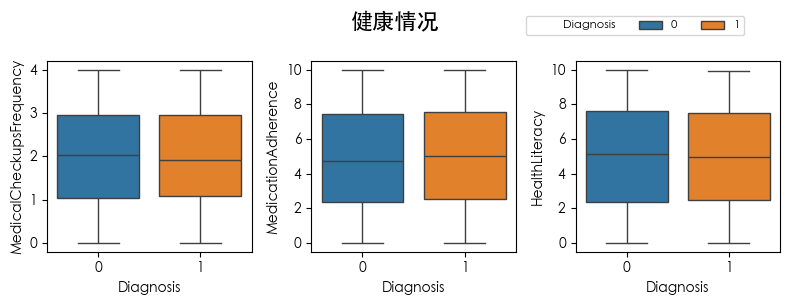

In [39]:

#1.个人统计信息
print('='*70,"个人统计信息",'='*70,)
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes = axes.flatten()

# Iterasi dan plot
for i, col in enumerate(personal_info):
    if col not in characteristic:
        sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
        sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
    
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend_.remove()  # 移除子图中的图例
    
# 创建一个虚拟的图例项
extra = mpatches.Patch(color='none', label='Diagnosis')
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("个人统计信息", fontsize=16, y=1)
plt.tight_layout()  # 调整布局以适应全局图例
plt.savefig('personal_info.png')
plt.show()


#2.生活方式
print('='*70,"生活方式",'='*70)
fig, axes = plt.subplots(2, 3, figsize=(8, 6))
axes = axes.flatten()

# Iterasi dan plot
for i, col in enumerate(lifestyle):
    if col not in characteristic:
        sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
        sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])

    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend_.remove()  # 移除子图中的图例
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("生活方式", fontsize=16, y=1)    
plt.tight_layout()
plt.savefig('lifestyle.png') 
plt.show()


#3.病史
print('='*70,"病史",'='*70)
fig, axes = plt.subplots(2, 3, figsize=(8,6))
axes = axes.flatten()
# Iterasi dan plot
for i, col in enumerate(medical_history):
    if col not in characteristic:
        sns.boxplot(x='Diagnosis', y=col,  hue='Diagnosis',data=df, ax=axes[i])
    else:
        sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
        
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
        
    axes[i].legend_.remove()  # 移除子图中的图例

axes[5].axis('off')
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("病史", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('medical_history.png') 
plt.show()



#4.医学测量结果
print('='*70,"医学测量结果",'='*70)
fig, axes = plt.subplots(4, 3, figsize=(8, 12))
axes = axes.flatten()

for i, col in enumerate(measurements):
    if col not in characteristic:
         sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
         sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend_.remove()  # 移除子图中的图例
    
axes[10].axis('off')
axes[11].axis('off')
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("医学测量结果", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('measurements.png') 
plt.show()



#5.药史
print('='*70,"药史",'='*70)
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
axes = axes.flatten()

for i, col in enumerate(medication):
    if col not in characteristic:
         sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
         sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
            
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
        
    axes[i].legend_.remove()  # 移除子图中的图例
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("药史", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('medication.png') 
plt.show()


#6.症状
print('='*70,"症状",'='*70)
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, col in enumerate(symptom):
    if col not in characteristic:
        sns.boxplot(x='Diagnosis', y=col, hue='Diagnosis',data=df, ax=axes[i])
    else:
        sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
          
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
        
    axes[i].legend_.remove()  # 移除子图中的图例

axes[8].axis('off')
axes[7].axis('off')
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("症状", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('symptom.png') 
plt.show()



#7.环境
print('='*70,"环境情况",'='*70)
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
axes = axes.flatten()

for i, col in enumerate(environment):
    if col not in characteristic:
         sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
         sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
           
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
        
    axes[i].legend_.remove()  # 移除子图中的图例
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("环境情况", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('environment.png')  
plt.show()



#8.健康
print('='*70,"健康情况",'='*70)
fig, axes = plt.subplots(1, 3, figsize=(8, 3))
axes = axes.flatten()

for i, col in enumerate(health):
    if col not in characteristic:
         sns.boxplot(x='Diagnosis', y=col,hue='Diagnosis', data=df, ax=axes[i])
    else:
         sns.countplot(x=col, hue='Diagnosis', data=df, ax=axes[i])
    
    if i == 0:
        # 从第一个子图中获取图例信息
        handles, labels = axes[i].get_legend_handles_labels()
        
    axes[i].legend_.remove()  # 移除子图中的图例
# 添加全局图例，包括虚拟的图例项
fig.legend(handles=[extra] + handles, labels=['Diagnosis'] + labels, loc='upper center', ncol=3, fontsize='small', bbox_to_anchor=(0.8, 1))
# 添加全局标题
fig.suptitle("健康情况", fontsize=16, y=1)    

plt.tight_layout()
plt.savefig('health.png') 
plt.show()

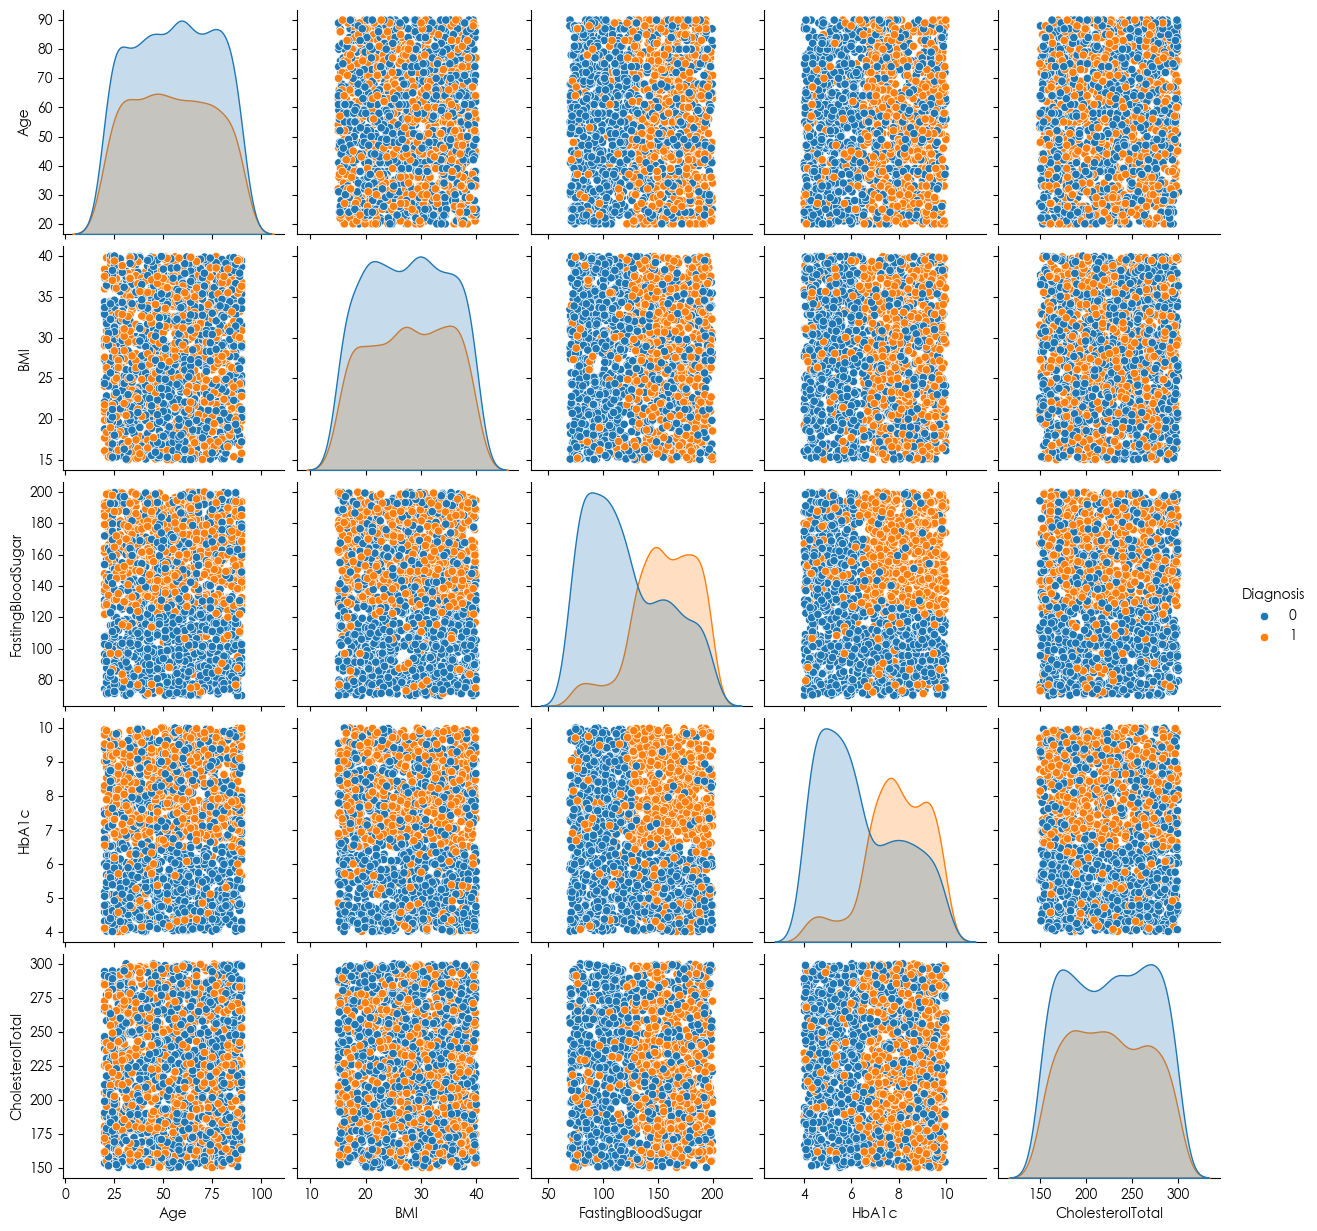

In [40]:
#selected features for pairplot
selected_features = ['Age', 'BMI', 'FastingBloodSugar', 'HbA1c', 'CholesterolTotal', 'Diagnosis']
sns.pairplot(df[selected_features], hue='Diagnosis')
plt.show()

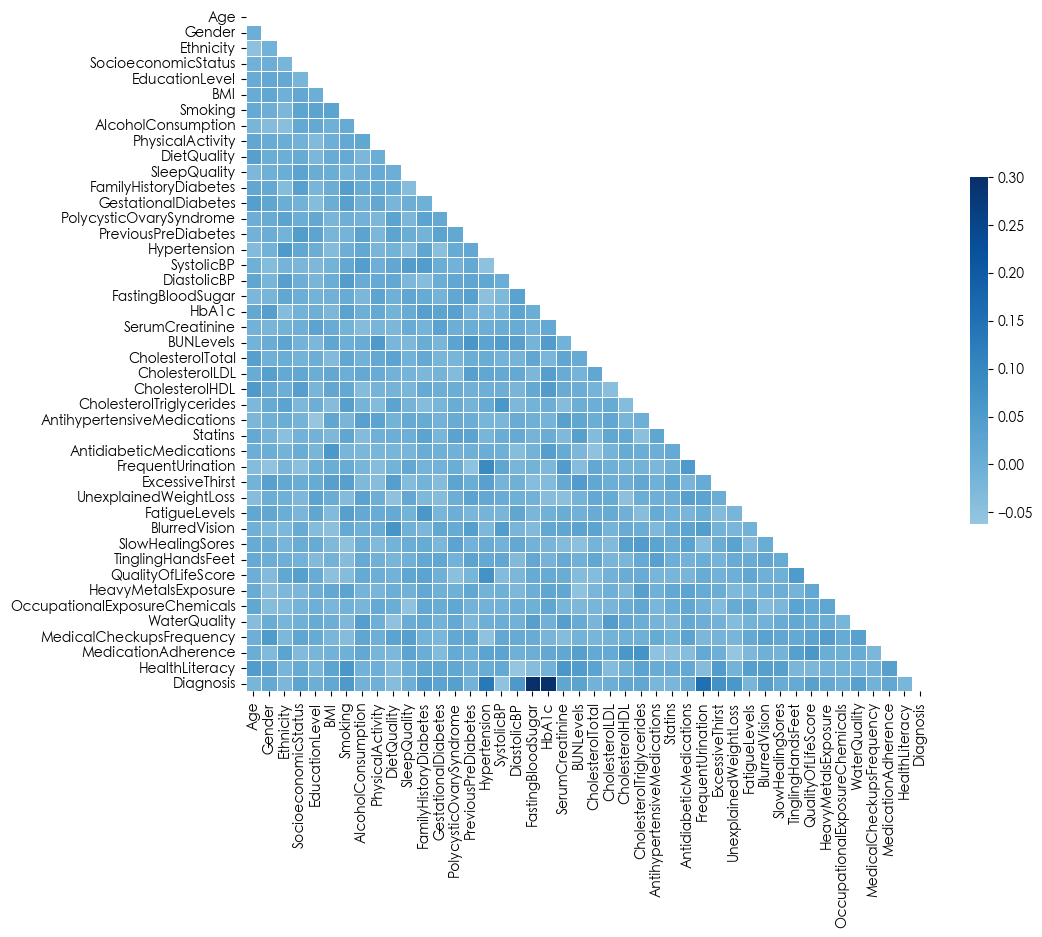

In [41]:
# 计算相关矩阵
corr = df.corr()
corr_table = pd.DataFrame(corr)

corr_table.to_csv('corr.csv', index=True) 
#隐藏上三角元素
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('corr.png') 
plt.show()

In [42]:
#剔除掉弱相关的特征
target_feature = 'Diagnosis'
weak_corr_with_target = corr_table[target_feature][(corr_table[target_feature] > -0.01) & (corr_table[target_feature] < 0.01)]
weak_corr_with_target

EducationLevel                  -0.002306
AlcoholConsumption              -0.009671
PhysicalActivity                -0.006413
SleepQuality                    -0.002938
CholesterolLDL                  -0.000660
SlowHealingSores                 0.006294
OccupationalExposureChemicals   -0.005859
MedicalCheckupsFrequency        -0.009598
Name: Diagnosis, dtype: float64

In [43]:
df.drop(['EducationLevel',
        'AlcoholConsumption',
        'PhysicalActivity', 
        'SleepQuality',
         'CholesterolLDL',
        'SlowHealingSores',
        'OccupationalExposureChemicals',
        'MedicalCheckupsFrequency'], inplace=True, axis=1)
df.head()


,Age,Gender,Ethnicity,SocioeconomicStatus,BMI,Smoking,DietQuality,FamilyHistoryDiabetes,GestationalDiabetes,PolycysticOvarySyndrome,...,UnexplainedWeightLoss,FatigueLevels,BlurredVision,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,WaterQuality,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,32.985284,1,4.898831,1,1,0,...,0,9.534169,0,1,73.765109,0,0,4.486980,7.211349,1
1,51,1,0,1,39.916764,0,8.941093,0,0,0,...,0,0.123214,0,0,91.445753,0,1,5.961705,5.024612,1
2,89,1,0,1,19.782251,0,7.722543,1,0,0,...,0,9.643320,0,0,54.485744,0,0,8.950821,7.034944,0
3,21,1,1,1,32.376881,1,4.804044,1,1,0,...,0,3.403557,0,0,77.866758,0,1,3.124769,4.717774,0
4,27,1,0,1,16.808600,0,2.532756,0,0,0,...,0,2.924687,0,0,37.731808,0,0,6.977741,7.887940,0


In [44]:
#更新
numerical_features = [x for x in numerical_features if x not in weak_corr_with_target]
characteristic = [x for x in characteristic if x not in weak_corr_with_target]

In [45]:
y = df["Diagnosis"]
X = df.drop(["Diagnosis"],axis =1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [49]:
class ModelPipeline:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test

    def create_pipeline(self, model):
        return Pipeline([
            ('transformer', StandardScaler()),
            ('predictor', model)
        ])

    def evaluate_model(self, pipeline, param_grid):
        try:
            grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
            grid.fit(self.X_train, self.y_train)
            best_model = grid.best_estimator_
            print(f'Best Parameters: {grid.best_params_}')
            y_pred = best_model.predict(self.X_test)
            accuracy = accuracy_score(self.y_test, y_pred)
            print(f'Accuracy: {accuracy}')
            return best_model
        except Exception as e:
            print(f"An error occurred: {e}")


In [51]:
pipeline_evaluator1 = ModelPipeline(X_train, y_train, X_test, y_test)
# Logistic Regression
lr_pipeline = pipeline_evaluator1.create_pipeline(LogisticRegression())
lr_param_grid = {
    'transformer__with_mean': [True, False],
    'predictor__C': [0.1, 1, 10, 20]
}
print("Evaluating Logistic Regression model:")
best_lr = pipeline_evaluator1.evaluate_model(lr_pipeline, lr_param_grid)

Evaluating Logistic Regression model:
Best Parameters: {'predictor__C': 10, 'transformer__with_mean': True}
Accuracy: 0.8386524822695035


In [52]:
pipeline_evaluator2 = ModelPipeline(X_train, y_train, X_test, y_test)
# Random Forest
rf_pipeline = pipeline_evaluator2.create_pipeline(RandomForestClassifier())
rf_param_grid = {
    'predictor__n_estimators': np.arange(1, 20),
    'predictor__max_depth': np.arange(1, 20)
}
print("Evaluating Random Forest model:")
best_rf = pipeline_evaluator2.evaluate_model(rf_pipeline, rf_param_grid)

Evaluating Random Forest model:
Best Parameters: {'predictor__max_depth': 13, 'predictor__n_estimators': 19}
Accuracy: 0.9113475177304965


In [53]:
pipeline_evaluator3 = ModelPipeline(X_train, y_train, X_test, y_test)
# XGBoost
xgb_pipeline = pipeline_evaluator3.create_pipeline(xgb.XGBClassifier(scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)))
xgb_param_grid = {
    
    'predictor__max_depth': np.arange(1, 20),
     'predictor__min_child_weight': np.arange(1, 20)

}
print("Evaluating XGBoost model:")
best_xgb = pipeline_evaluator3.evaluate_model(xgb_pipeline, xgb_param_grid)

Evaluating XGBoost model:
Best Parameters: {'predictor__max_depth': 1, 'predictor__min_child_weight': 12}
Accuracy: 0.9432624113475178


Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       347
           1       0.93      0.93      0.93       217

    accuracy                           0.94       564
   macro avg       0.94      0.94      0.94       564
weighted avg       0.94      0.94      0.94       564



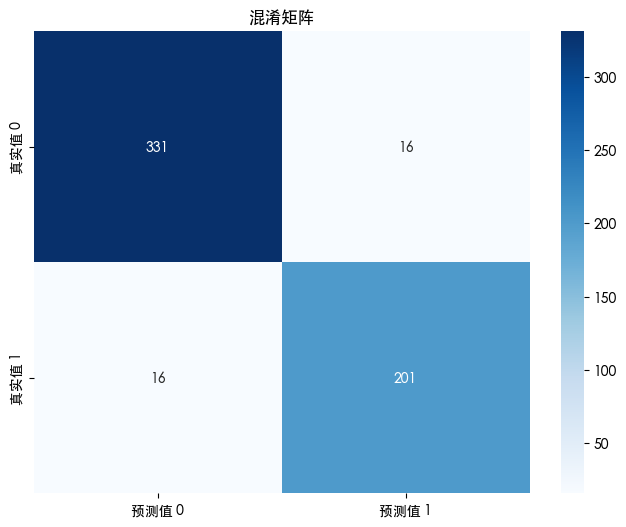

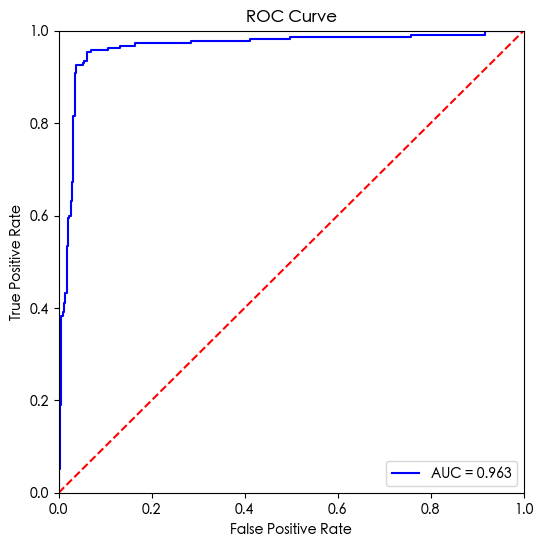

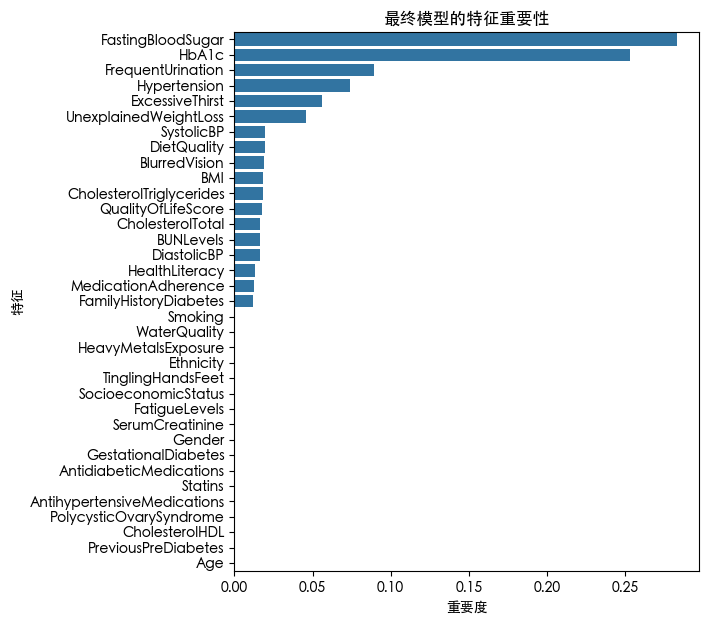

In [63]:
class ModelEvaluator:
    def __init__(self, model, X_test, y_test):
        self.model = model
        self.X_test = X_test
        self.y_test = y_test

    def evaluate(self):
        try:
            y_pred = self.model.predict(self.X_test)
            y_proba = self.model.predict_proba(self.X_test)[:, 1]
            print('Classification report XGBoost Classifier : \n', classification_report(y_test, y_pred))
            #混淆矩阵
            cm = confusion_matrix(y_test, y_pred)
            plt.rcParams['font.sans-serif']=['Heiti TC']
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                        xticklabels=['预测值 0', '预测值 1'], 
                        yticklabels=['真实值 0', '真实值 1'])
            plt.title('混淆矩阵')
            plt.savefig('confusion_matrix.png') 
            plt.show()
    
            self.plot_roc_curve(y_proba)
            self.plot_feature_importance()
        except Exception as e:
            print(f"An error occurred during evaluation: {e}")

    def plot_roc_curve(self,y_proba):
        y_proba = self.model.predict_proba(self.X_test)[:, 1]
        FPR, recall, _ = roc_curve(self.y_test, y_proba, pos_label=1)
        area = auc(FPR, recall)

        plt.figure(figsize=(6, 6))
        plt.plot(FPR, recall, 'b', label=f'AUC = {area:.3f}')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend(loc='lower right')
        plt.savefig('roc_curve.png')
        plt.show()

    def plot_feature_importance(self):
        if hasattr(self.model.named_steps['predictor'], 'feature_importances_'):
            importances = self.model.named_steps['predictor'].feature_importances_
            features_importances = pd.DataFrame({'特征': X_train.columns, '重要度': importances})
            features_importances.sort_values(by='重要度', ascending=False, inplace=True)
            plt.figure(figsize=(6, 7))
            sns.barplot(x='重要度', y='特征', data=features_importances)
            plt.xlabel('重要度')
            plt.ylabel('特征')
            plt.title("最终模型的特征重要性")
            plt.savefig('feature_importances.png') 
            plt.show()
        else:
            print("The model does not have feature_importances_ attribute.")
# Example usage
# Assuming best_model is the best model obtained from grid search
evaluator = ModelEvaluator(best_xgb, X_test, y_test)
evaluator.evaluate()